In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.cluster import AgglomerativeClustering
import random
from scipy.spatial import distance
import math
from ipywidgets import interact, widgets, interactive, fixed
import pickle

In [2]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19890101,0,5.0,312,54,9.0,313,8.1,306,6.2,287,5.3,252,0.0,0.0,0.0,0,0.99
1,19890101,1,4.7,316,46,6.8,325,7.4,329,4.6,318,2.2,261,0.0,0.0,0.0,0,1.00
2,19890101,2,4.5,315,41,5.0,347,6.8,2,4.0,18,2.2,94,0.0,0.0,0.0,0,1.00


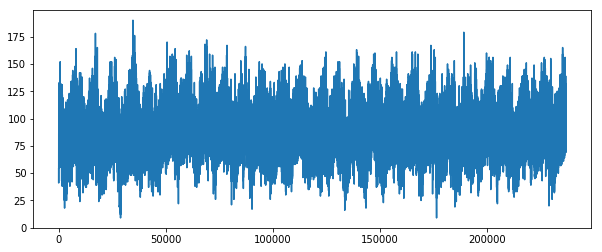

In [3]:
plt.figure(figsize = (10,4))
train_data = data[4]
train_data.plot()

In [135]:


def get_slices(data, divider):
    slices = []
    piece_len = len(data)//divider
    for i in range(0, len(data)- piece_len,piece_len):
        slices.append(data[i:i+piece_len])
    return np.asarray(slices)

def optimal_size(count):
    p = count**0.5
    l = math.ceil(p)
    t = math.floor(p)
   
    return l,t

def restore_data(ca, divider, i = 0, numb = 0, end = None):
    global cd
    if end == None and i == len(cd):
        return ca
    elif i == end:
        return ca
    ca_lvl = ca
    cd_lvl = get_slices(cd[i], divider)[numb]
    
    ts_rec = pywt.idwt(ca_lvl, cd_lvl, 'haar')
    return restore_data(ts_rec, divider, i+1, end = end)

def all_templates(data, labels, cluster_idx):
    mask = np.where(labels == cluster_idx)[0]
    claster = data[mask]
    
    template = []
    for i in range(len(mask)):
        template.append(data[mask[i]])
    return {"template":np.asarray(template),
            "mask":mask}
    

def plot_template(template, mask, size = None):
    plt.figure(figsize = (10,10))
    count = len(template)
    if size == None:
        w,h = optimal_size(count)
    else:
        w,h = size
    print(w,h)
    k = 0
    for i in range(w):
        for j in range(h):
            try:
                plt.subplot(h,w,k+1)
                plt.plot(restore_data(template[k], divider, numb = mask[k]))
                k+=1
            except Exception as e:
                break
                pass
    plt.show()    
    
def update_centers(centers):
    centers_ = []
    for center in centers:
        c = list(center)+list(center)
        centers_.append(c)
    return np.asarray(centers_)

In [136]:
centers = None
centers is  None

True

In [154]:
piece_len = 120 #Размер шаблона
divider = len(train_data)//piece_len #кол-во частей на которые бьются данные

level = 3 #начальный уровень разложения
n_clusters = 128 #кол-во кластеров
centers = None

while level!=0:

    coeffs = pywt.wavedec(train_data,'haar', level = level)
    ca, cd = coeffs[0], coeffs[1:]
    ca_lvl1 = get_slices(ca, divider)
    if centers is not None:
        kmeans = KMeans(n_clusters=n_clusters, init=centers)
    else:
        kmeans = KMeans(n_clusters=n_clusters)
    y_kmeans = kmeans.fit_predict(ca_lvl1)
    centers = kmeans.cluster_centers_
    centers = update_centers(centers)
    level-=1
    
    print(level)

2


C:\Users\Zoya\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


1
0


In [155]:
def main(idx):
    global ca_lvl1, y_kmeans
    template1 = all_templates(ca_lvl1, y_kmeans, idx)
    template = template1['template']
    mask = template1['mask']
    plot_template(template, mask, size = (5,5))
    
w = interactive(main, idx = widgets.IntSlider(min=0, max=max(y_kmeans), step=1, value=0))
display(w)

interactive(children=(IntSlider(value=0, description='idx', max=127), Output()), _dom_classes=('widget-interac…

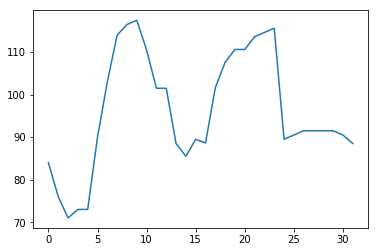

In [266]:
slice_num = 12
i = mask[0][slice_num]
plt.plot(restore_data(claster[slice_num], divider, numb = i))